## BANK LOAN ANALYSIS REPORT

### Import, verify and clean data  

In [1]:
#import libraries
import pandas as pd #importing, cleaning and stucturing data 
import numpy as np # numarical calculation
import matplotlib.pyplot as plt # graphs, labels and charts
import seaborn as sns   # for more statistical analysis and advanced graphs & charts
import warnings # give warning msg and provide information about that
import plotly.express as px # to create interactive adavance charts like area chart, line chart etc

In [2]:
df = pd.read_excel("C:/Users/harsh/Desktop/DA Project/Python/Finance Project/financial_loan.xlsx")

In [3]:
# check data is imported or not
df.head

<bound method NDFrame.head of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat Tec

In [4]:
print ("No of Raws:", df.shape[0])

No of Raws: 38576


In [5]:
print ("No of Raws:", df.shape[0])

No of Raws: 38576


In [6]:
### Data type; Object = Text, float64 = numarical and fractional values, datetime64 = date
df.dtypes


id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

### Analysis



##### Total Loan applications

In [7]:
total_loan_application = df['id'].count()
print("Total Loan Application:", total_loan_application)

Total Loan Application: 38576


##### MTD Total Loan applications

In [8]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
MTD_total_loan_application = mtd_data['id'].count()
print (f"MTD Loan Applications(for{latest_issue_date.strftime('%B %Y')}) : {MTD_total_loan_application}")

MTD Loan Applications(forDecember 2021) : 4314


##### Total Funded Amount

In [9]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/ 1000000
print("Total Funded Amount: ${:.2f}M" . format (total_funded_amount_millions))

Total Funded Amount: $435.76M


##### MTD Total Funded Amount

In [10]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
MTD_total_funded_amount = mtd_data['loan_amount'].sum()
MTD_total_funded_amount_millions = MTD_total_funded_amount/1000000

print("MTD_total_funded_amount: ${:.2f}M". format (MTD_total_funded_amount_millions))

MTD_total_funded_amount: $53.98M


##### Total Received Amount

In [11]:
total_received_amount = df['total_payment'].sum()
total_received_amount_millions = total_funded_amount/ 1000000
print("Total Received Amount: ${:.2f}M" . format (total_received_amount_millions))

Total Received Amount: $435.76M


##### MTD Total Received Amount

In [12]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

MTD_total_received_amount = mtd_data['total_payment'].sum()
MTD_total_received_amount_millions = MTD_total_received_amount/1000000

print("MTD_total_received_amount: ${:.2f}M". format (MTD_total_received_amount_millions))

MTD_total_received_amount: $58.07M


##### Average interest rate

In [13]:
average_interest_rate = df['int_rate'].mean()*100
print("Avg Int Rate: ${:.2f}%" . format (average_interest_rate) )

Avg Int Rate: $12.05%


##### Average Debt to income ratio (DTI)

In [14]:
average_dti = df['dti'].mean()*100
print("Avg DTI: ${:.2f}%" . format (average_dti) )

Avg DTI: $13.33%


### Good Loan Metrics

In [15]:
good_loan = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_application = df['id'].count()

good_loan_application = good_loan['id'].count()
good_loan_funded_amount = good_loan['loan_amount'].sum()
good_loan_received = good_loan['total_payment'].sum()

good_loan_funded_amount_million = good_loan_funded_amount/1000000
good_loan_received_million = good_loan_received/1000000

good_loan_percentage = (good_loan_application)/(total_loan_application) * 100

print("Good Loan Applications:", good_loan_application)
print("Good Loan Funded Amount in Million: ${:.2f}" . format (good_loan_funded_amount_million))
print("Good Loan Total Received in Million: ${:.2f}" . format (good_loan_received_million))
print("Percentage of Good Loan Application: ${:.2f}%" . format (good_loan_percentage)) 



Good Loan Applications: 33243
Good Loan Funded Amount in Million: $370.22
Good Loan Total Received in Million: $435.79
Percentage of Good Loan Application: $86.18%


### Bad Loan Metrics

In [16]:
Bad_loan = df[df['loan_status'].isin(["Charged Off"])]

total_loan_application = df['id'].count()

Bad_loan_application = Bad_loan['id'].count()
Bad_loan_funded_amount = Bad_loan['loan_amount'].sum()
Bad_loan_received = Bad_loan['total_payment'].sum()

Bad_loan_funded_amount_million = Bad_loan_funded_amount/1000000
Bad_loan_received_million = Bad_loan_received/1000000

Bad_loan_percentage = (Bad_loan_application)/(total_loan_application) * 100

print("Bad Loan Applications:", Bad_loan_application)
print("Bad Loan Funded Amount in Million: ${:.2f}" . format (Bad_loan_funded_amount_million))
print("Bad Loan Total Received in Million: ${:.2f}" . format (Bad_loan_received_million))
print("Percentage of Bad Loan Application: ${:.2f}%" . format (Bad_loan_percentage)) 

Bad Loan Applications: 5333
Bad Loan Funded Amount in Million: $65.53
Bad Loan Total Received in Million: $37.28
Percentage of Bad Loan Application: $13.82%


### Chart


##### Monthly Trends by Issue Date for Total Funded Amount

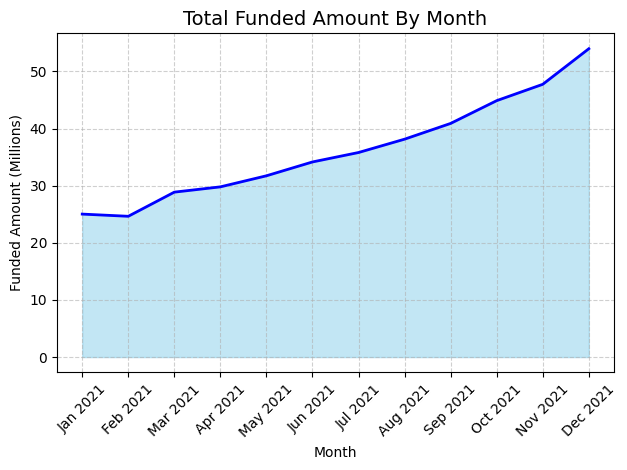

In [17]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False) ['loan_amount'] 
    .sum() 
    .div(1000000) 
    .reset_index(name= 'loan_amount_million'))

# defining chart
plt.Figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_million'], color='skyblue', alpha = 0.5) # color of area chart, alpha is transperancy of color
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_million'], color = 'blue', linewidth = 2)

# create a lables to the chart
for i, row in monthly_funded. iterrows():
    plt.Text(i, row['loan_amount_million'] + 0.1, f"{row['loan_amount_million'] :.2f}",
             ha='center', va= 'bottom', fontsize = 9, rotation=0, color='black')
    
plt.title('Total Funded Amount By Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True,linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()
             

##### Monthly Trends by Issue Date for Total Received Amount

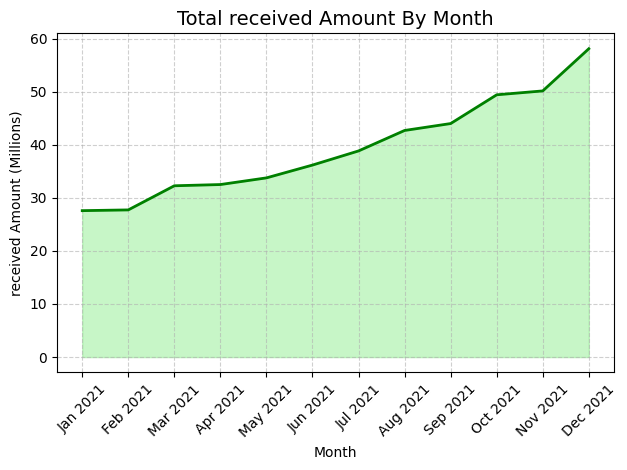

In [18]:
monthly_received = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False) ['total_payment'] 
    .sum() 
    .div(1000000) 
    .reset_index(name= 'amount_received_million'))

# defining chart
plt.Figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'], monthly_received['amount_received_million'], color='lightgreen', alpha = 0.5) # color of area chart, alpha is transperancy of color
plt.plot(monthly_received['month_name'], monthly_received['amount_received_million'], color = 'green', linewidth = 2)

# create a lables to the chart
for i, row in monthly_received. iterrows():
    plt.Text(i, row['amount_received_million'] + 0.1, f"{row['amount_received_million'] :.2f}",
             ha='center', va= 'bottom', fontsize = 9, rotation=0, color='black')
    
plt.title('Total received Amount By Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('received Amount (Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True,linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

##### Monthly Trends by Issue Date for Total Loan Application

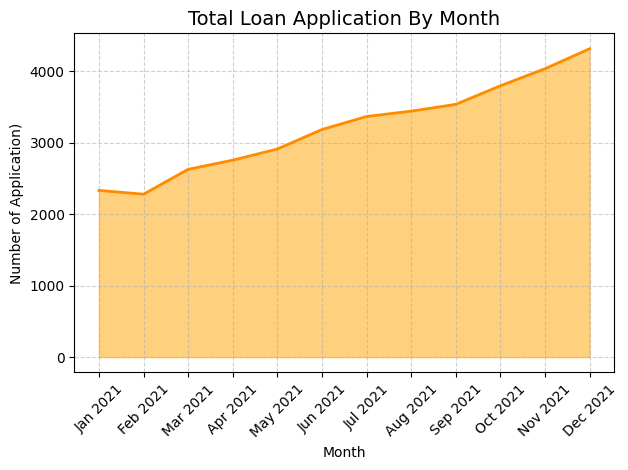

In [19]:
monthly_application = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False) ['id'] 
    .count() 
    .reset_index(name= 'loan_application_count'))

# defining chart
plt.Figure(figsize=(10,5))
plt.fill_between(monthly_application['month_name'], monthly_application['loan_application_count'], color='orange', alpha = 0.5) # color of area chart, alpha is transperancy of color
plt.plot(monthly_application['month_name'], monthly_application['loan_application_count'], color = 'darkorange', linewidth = 2)

# create a lables to the chart
for i, row in monthly_application. iterrows():
    plt.Text(i, row['loan_application_count'] + 0.5, f"{row['loan_application_count']}",
             ha='center', va= 'bottom', fontsize = 9, rotation=0, color='black')
    
plt.title('Total Loan Application By Month', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Number of Application)')
plt.xticks(ticks=range(len(monthly_application)), labels=monthly_application['month_name'], rotation=45)
plt.grid(True,linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

##### Regional Analysis by State for Total Funded Amount

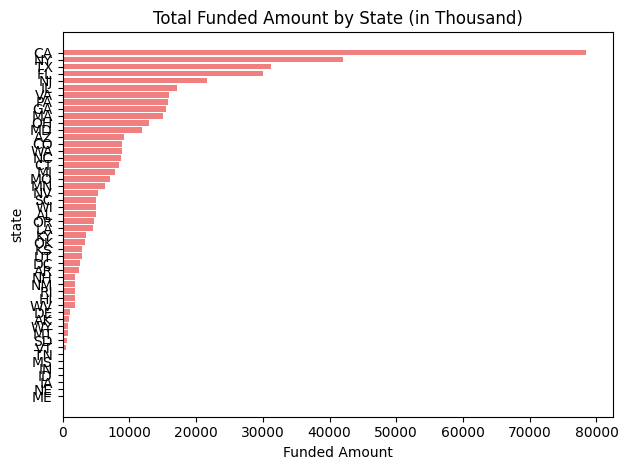

In [20]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousand = state_funding/1000

plt.Figure(figsize=(10,8))
bars= plt.barh(state_funding_thousand.index, state_funding_thousand.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.Text(width + 5, bar.get_y() + bar.get_height()/2, f'{width:,.0f}K', va='center', fontsize=5)

plt.title('Total Funded Amount by State (in Thousand)')
plt.xlabel('Funded Amount')
plt.ylabel('state')
plt.tight_layout()
plt.show()

##### Long Term Analysis by Total Funded Amount

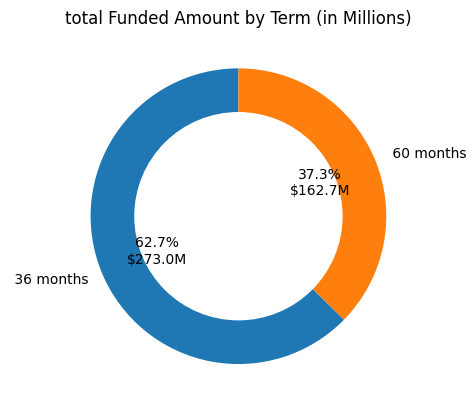

In [21]:
term_funding_million = df.groupby('term')['loan_amount'].sum()/1000000

plt.Figure(figsize=(5,5))
plt.pie(
    term_funding_million,
    labels=term_funding_million.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_million)/100:.1f}M",
    startangle=90,
    wedgeprops={'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.7, color='white'))
plt.title("total Funded Amount by Term (in Millions)")
plt.show()

##### Employee lenth by Total Funded Amount

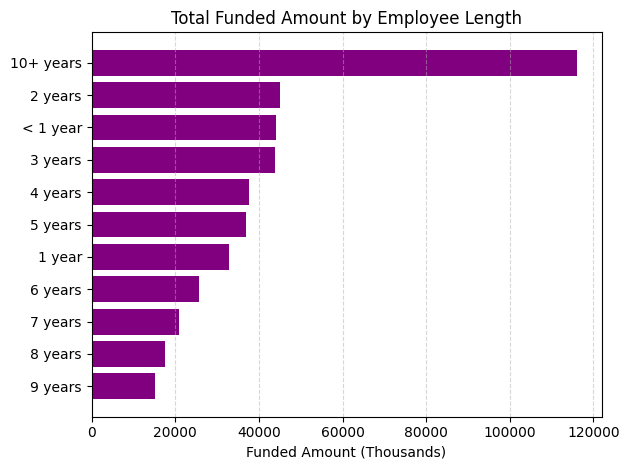

In [22]:
emp_funding_thousands = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.Figure(figsize=(10,6))
bars= plt.barh(emp_funding_thousands.index, emp_funding_thousands, color = 'purple')

for bar in bars:
    width = bar.get_width()
    plt.Text(width + 5, bar.get_y() + bar.get_height()/2,
             f"${width:,.0f}K", va='center', fontsize=9)
    
plt.title("Total Funded Amount by Employee Length")
plt.xlabel("Funded Amount (Thousands)")
plt.grid(axis='x', linestyle='--', alpha = 0.5)
plt.tight_layout()
plt.show()

##### Loan Purpose by Total Funded Amount

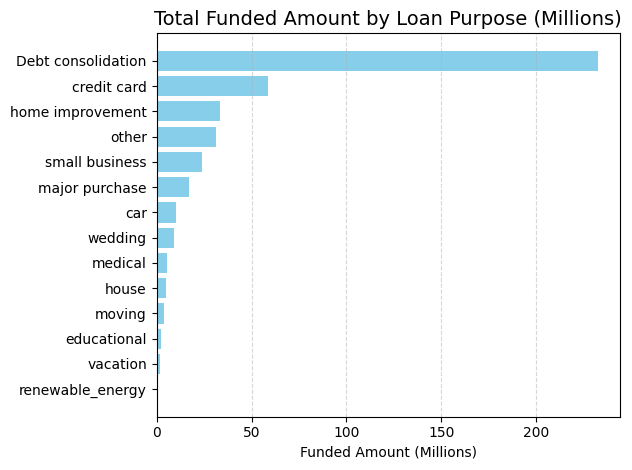

In [23]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000)

plt.Figure(figsize=(10,6))
bars= plt.barh(purpose_funding_millions.index, purpose_funding_millions, color = 'skyblue')

for bar in bars:
    width = bar.get_width()
    plt.Text(width + 5, bar.get_y() + bar.get_height()/2,
             f"${width:,.0f}K", va='center', fontsize=9)
    
plt.title("Total Funded Amount by Loan Purpose (Millions)", fontsize = 14)
plt.xlabel("Funded Amount (Millions)")
plt.grid(axis='x', linestyle='--', alpha = 0.5)
plt.tight_layout()
plt.show()

##### Home Ownership by Total Funded Amount

In [24]:
home_fundind = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_fundind['loan_amount_million'] = home_fundind['loan_amount']/1000000

fig = px.treemap(
    home_fundind,
    path=['home_ownership'],
    values='loan_amount_million',
    color='loan_amount_million',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (in Million)'
)
fig.show()